In [1]:
import ultralytics # library for pretrained YoloV8
import numpy as np # for array manipulation
import matplotlib.pyplot as plt # for visualizatoin
import os
from PIL import Image # to handle image file
import tensorflow as tf # to handle conversion into tflite
import onnx # to handle model conversion into onnx format
from onnx_tf.backend import prepare # handle onnx model format
import cv2 # handle processing with image
import random # to use randomizer in colors
import pybboxes as pbx # to standardize box used in detection
ultralytics.checks()

Ultralytics YOLOv8.0.109  Python-3.11.3 torch-2.0.1+cpu CPU
Setup complete  (8 CPUs, 7.8 GB RAM, 352.4/475.7 GB disk)


In [2]:
# initiate pre trained model for detection
model = ultralytics.YOLO('yolov8n.pt')

## train model with 200 epochs
# NOTE: image augmentation done in data.yaml file
model.train(data = 'data.yaml', epochs = 200)

100%|██████████| 6.23M/6.23M [00:01<00:00, 4.79MB/s]
New https://pypi.org/project/ultralytics/8.0.112 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.109  Python-3.11.3 torch-2.0.1+cpu CPU
yolo\engine\trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=200, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False,

RuntimeError: Dataset 'data.yaml' error  
Dataset 'data.yaml' images not found , missing paths ['F:\\Code\\Defect_Detection\\valid\\images']
Note dataset download directory is 'C:\Users\ASUS\Desktop\Ngoding\Python\Bangkit\Re-Clothes\datasets'. You can update this in 'C:\Users\ASUS\AppData\Roaming\Ultralytics\settings.yaml'

In [4]:
# inspect performance for validation set
metrics = model.val()

Ultralytics YOLOv8.0.109  Python-3.10.8 torch-2.0.1+cpu CPU
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients
val: Scanning F:\Code\Defect_Detection\valid\labels.cache... 31 images, 0 backgrounds, 0 corrupt: 100%|██████████| 31/31 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:05<00:00,  2.61s/it]
                   all         31         41      0.634      0.486      0.494      0.242
                  Hole         31         19       0.55      0.368      0.364      0.117
                  Knot         31         11       0.62      0.636      0.592      0.304
                 Stain         31         11      0.732      0.455      0.526      0.306
Speed: 3.4ms preprocess, 149.4ms inference, 0.0ms loss, 0.8ms postprocess per image
Results saved to runs\detect\val5


0.24224973551050108

In [49]:
### load all test image into one array

import os
import numpy as np
from PIL import Image

# Directory path
directory = 'test/images'

# List to store the image arrays
image_arrays = []

# Iterate through all files in the directory
for filename in os.listdir(directory):
    # Check if the file is an image (you can modify the condition as needed)
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Full path to the image file
        filepath = os.path.join(directory, filename)

        # Open the image file using PIL
        image = Image.open(filepath)

        # Convert the image to a NumPy array
        image_array = np.array(image)

        # Append the image array to the list
        image_arrays.append(image_array)

# Convert the list of image arrays to a NumPy array
image_arrays = np.array(image_arrays)

# Print the shape of the image arrays
print("Shape of image arrays:", image_arrays.shape)

Shape of image arrays: (22, 416, 416, 3)



0: 640x640 2 Stains, 276.6ms
Speed: 12.1ms preprocess, 276.6ms inference, 3.9ms postprocess per image at shape (1, 3, 640, 640)


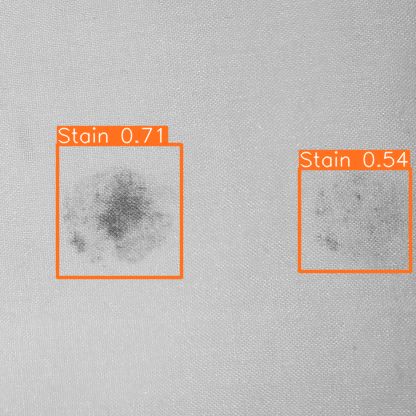

In [50]:
# inspect model prediction in test set
results = model(image_arrays[1])
res = results[0]
box = res.boxes[0]

# plot image
Image.fromarray(res.plot()[:, :, ::-1])

## Load from previous model


0: 640x640 1 Hole, 1 Knot, 200.8ms
Speed: 5.6ms preprocess, 200.8ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


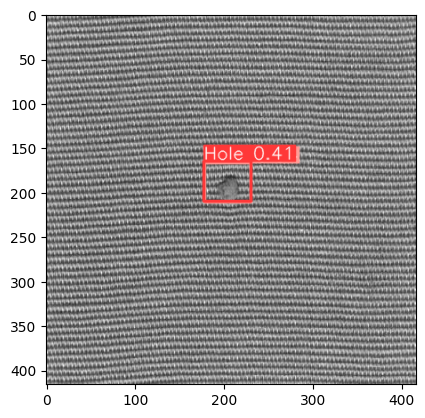

In [51]:
# testing the saved model in pt format
model = ultralytics.YOLO('runs/detect/train15/weights/best.pt')

# open image
image = Image.open('test/images/a00003_jpg.rf.41811eb9fdc1b70c2bd6881e46306b53.jpg')
image_array = np.array(image)

# do detection in inputted image
results = model(image_array)
res = results[0]
box = res.boxes[0]

# plot the image and boxes
plt.imshow(Image.fromarray(res.plot()[:, :, ::-1]))

# Convert to TFLite

In [70]:
## First Convert yolo model into onnx format
model.export(format="onnx",imgsz=[640, 640], opset=12)

Ultralytics YOLOv8.0.109  Python-3.11.3 torch-2.0.1+cpu CPU

PyTorch: starting from runs\detect\train15\weights\best.pt with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (6.0 MB)

ONNX: starting export with onnx 1.14.0 opset 12...
ONNX: export success  1.5s, saved as runs\detect\train15\weights\best.onnx (11.7 MB)

Export complete (2.2s)
Results saved to C:\Users\ASUS\Desktop\Ngoding\Python\Bangkit\Defect_detection\runs\detect\train15\weights
Predict:         yolo predict task=detect model=runs\detect\train15\weights\best.onnx imgsz=640 
Validate:        yolo val task=detect model=runs\detect\train15\weights\best.onnx imgsz=640 data=data.yaml 
Visualize:       https://netron.app


============== Diagnostic Run torch.onnx.export version 2.0.1+cpu ==============
verbose: False, log level: Level.ERROR
======================= 0 NONE 0 NOTE 0 WARNING 0 ERROR ========================



'runs\\detect\\train15\\weights\\best.onnx'

In [71]:
import tensorflow as tf
import onnx
from onnx_tf.backend import prepare

# convert the onnx model format before into saved model format
onnx_model = onnx.load("runs\\detect\\train15\\weights\\best.onnx")  # load onnx model
tf_rep = prepare(onnx_model)  # prepare tf representation
tf_rep.export_graph("result/tf_saved_model.pb")  # export the model

INFO:tensorflow:Assets written to: result/tf_saved_model.pb\assets


INFO:tensorflow:Assets written to: result/tf_saved_model.pb\assets


In [72]:
# finally process the model into tflite format
converter = tf.lite.TFLiteConverter.from_saved_model('result/tf_saved_model.pb')
tflite_model = converter.convert()

with open('yolov8_model_V2_compressed.tflite', 'wb') as f:
  f.write(tflite_model)

# Test Saved Model

## Function for testing model

In [2]:
import os
import numpy as np
from PIL import Image
import cv2
import random
import matplotlib.pyplot as plt

def letterbox(im, new_shape=(640, 640), color=(114, 114, 114), auto=True, scaleup=True, stride=32):
    ### steps of preprocessing image resizing and rescaling
    # Resize and pad image while meeting stride-multiple constraints
    shape = im.shape[:2]  # current shape [height, width]
    if isinstance(new_shape, int):
        new_shape = (new_shape, new_shape)

    # Scale ratio (new / old)
    r = min(new_shape[0] / shape[0], new_shape[1] / shape[1])
    if not scaleup:  # only scale down, do not scale up (for better val mAP)
        r = min(r, 1.0)

    # Compute padding
    new_unpad = int(round(shape[1] * r)), int(round(shape[0] * r))
    dw, dh = new_shape[1] - new_unpad[0], new_shape[0] - new_unpad[1]  # wh padding

    if auto:  # minimum rectangle
        dw, dh = np.mod(dw, stride), np.mod(dh, stride)  # wh padding

    dw /= 2  # divide padding into 2 sides
    dh /= 2

    if shape[::-1] != new_unpad:  # resize
        im = cv2.resize(im, new_unpad, interpolation=cv2.INTER_LINEAR)
    top, bottom = int(round(dh - 0.1)), int(round(dh + 0.1))
    left, right = int(round(dw - 0.1)), int(round(dw + 0.1))
    im = cv2.copyMakeBorder(im, top, bottom, left, right, cv2.BORDER_CONSTANT, value=color)  # add border
    return im, r, (dw, dh)

# initiate the class and color with random color
names = ['Hole', 'Knot', "Stain"]
colors = {name:[random.randint(0, 255) for _ in range(3)] for i,name in enumerate(names)}

## Test tflite model

## Pre-process image

In [3]:

def preprocess(image_path, new_shape = (640, 640)):
    # input img and convert into rgb
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed
    ori_image = image.copy()

    # get the ratio between desired model input shape and the user input shape
    image, ratio, dwdh = letterbox(image, auto=False, new_shape= new_shape)
    image = np.expand_dims(image, axis=0)

    # transpose image into shape that model receives
    image = image.transpose((0, 3, 1, 2))
    image = np.ascontiguousarray(image)

    # casting to float and normalize each pixel
    image = image.astype(np.float32)
    image = image / 255

    return image

In [52]:
### testing the tflite model

# load the tflite model
model_path = "tflite/yolov8_model_V2.tflite"
interpreter = tf.lite.Interpreter(model_path=model_path)

# inspect input and output details for preprocess and postprocess
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# allocate tensors as first step in generating prediction
interpreter.allocate_tensors()

# input img and convert into rgb
image = cv2.imread('test/images/a00003_jpg.rf.41811eb9fdc1b70c2bd6881e46306b53.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB if needed

# copy the image into variable in case we need it
ori_image = image.copy()

# get the ratio between desired model input shape and the user input shape
image, ratio, dwdh = letterbox(image, auto=False, new_shape=(640, 640))

# tune the dimension of image to match the input details of the model
image = np.expand_dims(image, axis = 0)
image = image.transpose((0, 3, 1, 2))
image = np.ascontiguousarray(image)

# casting to float and normalize each pixel
input_image = image.astype(np.float32)
input_image = input_image / 255

# give input to the tflite model
input_shape = input_details[0]['shape']
interpreter.set_tensor(input_details[0]['index'], input_image)

In [53]:
# get the prediction
interpreter.invoke()

# get the output data
output_data = interpreter.get_tensor(output_details[0]['index'])

## Post-Process and visualize

In [43]:
def check_probs(probs, threshold = 0.5):
    '''
        return label of highest probability and greater than threshold
        if not pass the threshold will return -1
    '''
    probs = np.array(probs)
    status = probs > threshold
    if True in status:
        idx_argmax = np.argmax(probs)
        return idx_argmax, round(probs[idx_argmax], 3)
    else:
        return -1, 0

def coco_to_yolo(coco_box, ori_image_size, input_shape=(640, 640)):
    '''
        convert from coco box format into yolo box format
    '''

    # get the ratio for both axis
    ratio_X = input_shape[0] / ori_image_size[0]
    ratio_Y = input_shape[1] / ori_image_size[1]

    # convert the coco box into yolo box format
    yolo_box = np.array(pbx.convert_bbox(coco_box, from_type="coco", to_type="yolo", image_size=input_shape))

    # rescale the box with both of ratio x and y
    yolo_box[0] *= input_shape[0] / ratio_X
    yolo_box[2] *= input_shape[0] / ratio_X
    yolo_box[1] *= input_shape[1] / ratio_Y
    yolo_box[3] *= input_shape[1] / ratio_Y

    # cast all of the element in arrya into integer
    yolo_box = yolo_box.round().astype(np.int32).tolist()

    # separate the weight and height 
    w, h = yolo_box[2], yolo_box[3]

    # convert those height and weight into coords by subtractign with the other coords
    yolo_box[2] = yolo_box[0] - yolo_box[2]
    yolo_box[3] = yolo_box[1] - yolo_box[3]

    return yolo_box, (w, h)

def filter_output_detection(output_box, ori_image_size, model_input_shape = (640, 640),threshold = 0.3):
    '''
        filter prediction based on confidence score
        return filtered class, score, box, and (weight, height)
    '''
    global names

    # initialize the result array
    results = []
    for box in output_box:
        # separate the box component and score probability
        box_shape = box[:4]
        probs = box[4:]

        # filter the box by highest score and more than specified threshold
        label, score = check_probs(probs=probs, threshold=threshold)
        if label != -1:
            yolo_box, wh = coco_to_yolo(box_shape, ori_image_size, input_shape=model_input_shape)
            name = names[label]
            results.append([name, score, yolo_box, wh])
    return results

def check_box_diff(box1, box2, tolerance_coord):
    '''
        function to make sure there are not many redundance boxes
        return boolean
    '''
    box1 = np.array(box1)
    box2 = np.array(box2)
    diff_box = box1 - box2
    return (abs(diff_box) < tolerance_coord).all()

def group_output_detection(filtered_output, tolerance_coord = 15):
    '''
        Group box detection into one boxes based on tolerance coords
        return box detection
    '''

    # sort the box array by score
    sorted_out = sorted(filtered_output, key=lambda x: x[1])

    # initialize the array for results and iteration variable
    main_category = []
    i = 0

    # do looping until all of the element in array terminated
    while len(sorted_out) > 0:
        # copy the content of array
        temp_sorted_out = sorted_out.copy()

        # pick the highest score as the central
        center = sorted_out[0]

        # init array for storing box close to the center and remove it later
        move_idx = []
        close = []

        # looping check all boxes for filtering the very close boxes
        for i in range(1, len(sorted_out)):
            if check_box_diff(center[2], sorted_out[i][2], tolerance_coord):
                move_idx.append(i)
        
        # remove the close box to the center
        for i in range(len(move_idx)):
            temp = sorted_out.pop(move_idx[i] - i)
            close.append(temp)

        # store the highest score box into array result
        main_category.append(sorted_out.pop(0))
    return main_category

[235, 213, 179, 174] 0.125


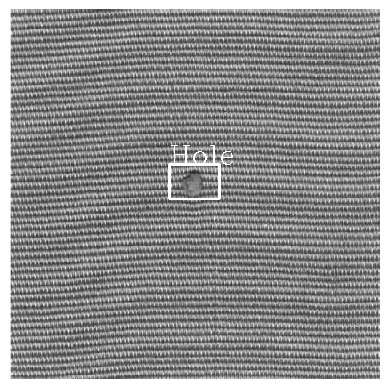

In [44]:
# get the original image size
ori_image_size = ori_image[:, :].shape

# filter and group boxes
filtered_output = filter_output_detection(output_data[0, :].T, ori_image_size, threshold= 0.1, model_input_shape= (640, 640))
grouped_output = group_output_detection(filtered_output, ori_image_size[0] * 0.15)

# draw box in the inputterd image
for box_data in grouped_output:
    name, score, box, wh = box_data
    text =name
    color = (255, 255, 255)
    print(box, score)
    cv2.rectangle(ori_image, box[:2], box[2:], color, 2)
    cv2.putText(ori_image, text, (box[0] - wh[0], box[1] - wh[1]), 
          cv2.FONT_HERSHEY_COMPLEX, 1, [255, 255, 255], thickness = 1) 

# show the image in notebook and save it into local directory wihout axis
plt.imshow(ori_image, interpolation='nearest')
plt.axis('off')
plt.savefig("hole.png", bbox_inches='tight')